In [92]:
# Load Libraries
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rc('font', family='serif', size=11)

# k-Means Analysis of Autoencoder Latent Vectors

## Open Latent Vector Data

In [108]:
dataSet = 'ex0'

In [109]:
# Read data
if dataSet == 'ex0':
    fileLV = '../results/ex0/latent_vectors.csv'
else:
    print("Unknown Dataset")

dataLV = pd.read_csv(fileLV, index_col=[0])
dataLV.latent_vector = dataLV.latent_vector.map(lambda x: ast.literal_eval(x))
dataLV.latent_vector = dataLV.latent_vector.map(lambda x: np.asarray(x))

latentV = np.asarray([dataLV.latent_vector[i] 
                      for i in range(len(dataLV.latent_vector))])
labelV = np.asarray(dataLV.label)
ctypes, ccounts = np.unique(labelV, return_counts=True)

nSamples = len(latent)
nLSpace = len(latent.latent_vector[0])
print('Read in Latent Vector.')
print('   Samples: {}'.format(nSamples))
print('   Latent Space Dimension: {}'.format(nLSpace))
print('   Number of Cloud Types: {}'.format(len(ctypes)))

Read in Latent Vector.
   Samples: 219904
   Latent Space Dimension: 3
   Number of Cloud Types: 9


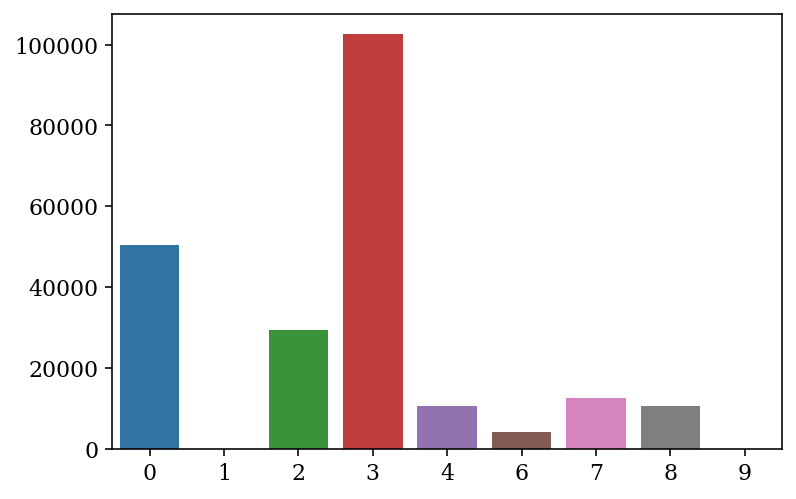

In [88]:
# Plot the unique counts
sns.barplot(x=ctypes, y=ccounts)

## Subset the Data

In [106]:
dataSubset = True
nSubset = 500

In [114]:
# Subset the data
if dataSubset:
    rng_state = np.random.get_state()
    np.random.shuffle(labelV)
    np.random.set_state(rng_state)
    np.random.shuffle(latentV)

    labelV = labelV[:nSubset]
    latentV = latentV[:nSubset,:]
    print('Subset Latent Vector.')
    print('   New Shape: {}'.format(list(latentV.shape)))

Subset Latent Vector.
   New Shape: [500, 3]


## Perform k-Means

In [115]:
calcKMeans = True
saveKMeans = True
saveKFile = './save/' + dataSet + '_kClusters.pkl'

n_init = 10
range_n_clusters = [2]

In [121]:
# Perform k-Means
if calcKMeans:
    
    labelP = {}
    for n_clusters in range_n_clusters:
        
        print('Processing {} Clusters'.format(n_clusters))
        # MiniBatch KMeans
        miniK = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++',
                                n_init=n_init)
        cluster_labels = miniK.fit_predict(latentV)
        labelP[n_clusters] = cluster_labels

        # Real KMeans
        #realK = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)
        #cluster_labels = realK.fit_predict(latentV)
        #labelP[n_clusters] = cluster_labels
    print('Finished Processing')

    if saveKMeans:
        with open(saveKFile, 'wb') as handle:
          pickle.dump([labelP,labelV], handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('Saved File: ', saveKFile)

Processing 2 Clusters
Finished Processing


FileNotFoundError: [Errno 2] No such file or directory: './save/ex0_kClusters.pkl'

In [119]:
labelP[2].shape

(219904,)

## Calculate Silhouette Score

In [ ]:
calcSS = True
plotSS = True

In [ ]:
# Calculate the average silhouette score
if calcSS:
    silhS = {}
    for n_clusters in range_n_clusters:
        silhouette_avg = silhouette_score(latentV, cluster_labels)
        print('Number of Clusters: {}, Average Silhouette Score: {}'.format(
            n_clusters, silhouette_avg))

In [ ]:
# Plot the silhouette stats and scores
if plotSS:
    for n_clusters in range_n_clusters:
        cluster_labels = labelP[n_clusters]
        
        # Compute silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(latentV, cluster_labels)
        
        y_lower=10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to 
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
                        size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
            
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10
            
        ax1.set_title("Silhouette Plot for {} Clusters".format(n_clusters))
        ax1.set_xlabel("Silhouette Coefficient")
        ax1.set_ylabel("Cluster")
        
        # The vertical line for average silhouette score of all values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-1, -0.6, -0.2, 0.2, 0.6, 1])
        
        # 2nd Plot showing actual clusters formed
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(latentVS[:,0], latentVS[:,1], latentVS[:,2],
                    marker='.', alpha=0.7, c=colors, edgecolor=colors)
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('')
        ax2.set_title("Visualiation of {} Clusters".format(n_clusters))

        #ax2.view_init(elev=10., azim=20)
        
        if saveNClusters:
            fileName = nClustersPrefix + str(n_clusters) + '.png'
            plt.savefig(fileName,bbox_inches='tight')
        else:
            plt.show()

## Plot the latent space in the respective dimension.  
  * 2 dimensions 
  * 3 dimensions at four different angles
  * N dimensions reduced to 2 with PCA and tSNE

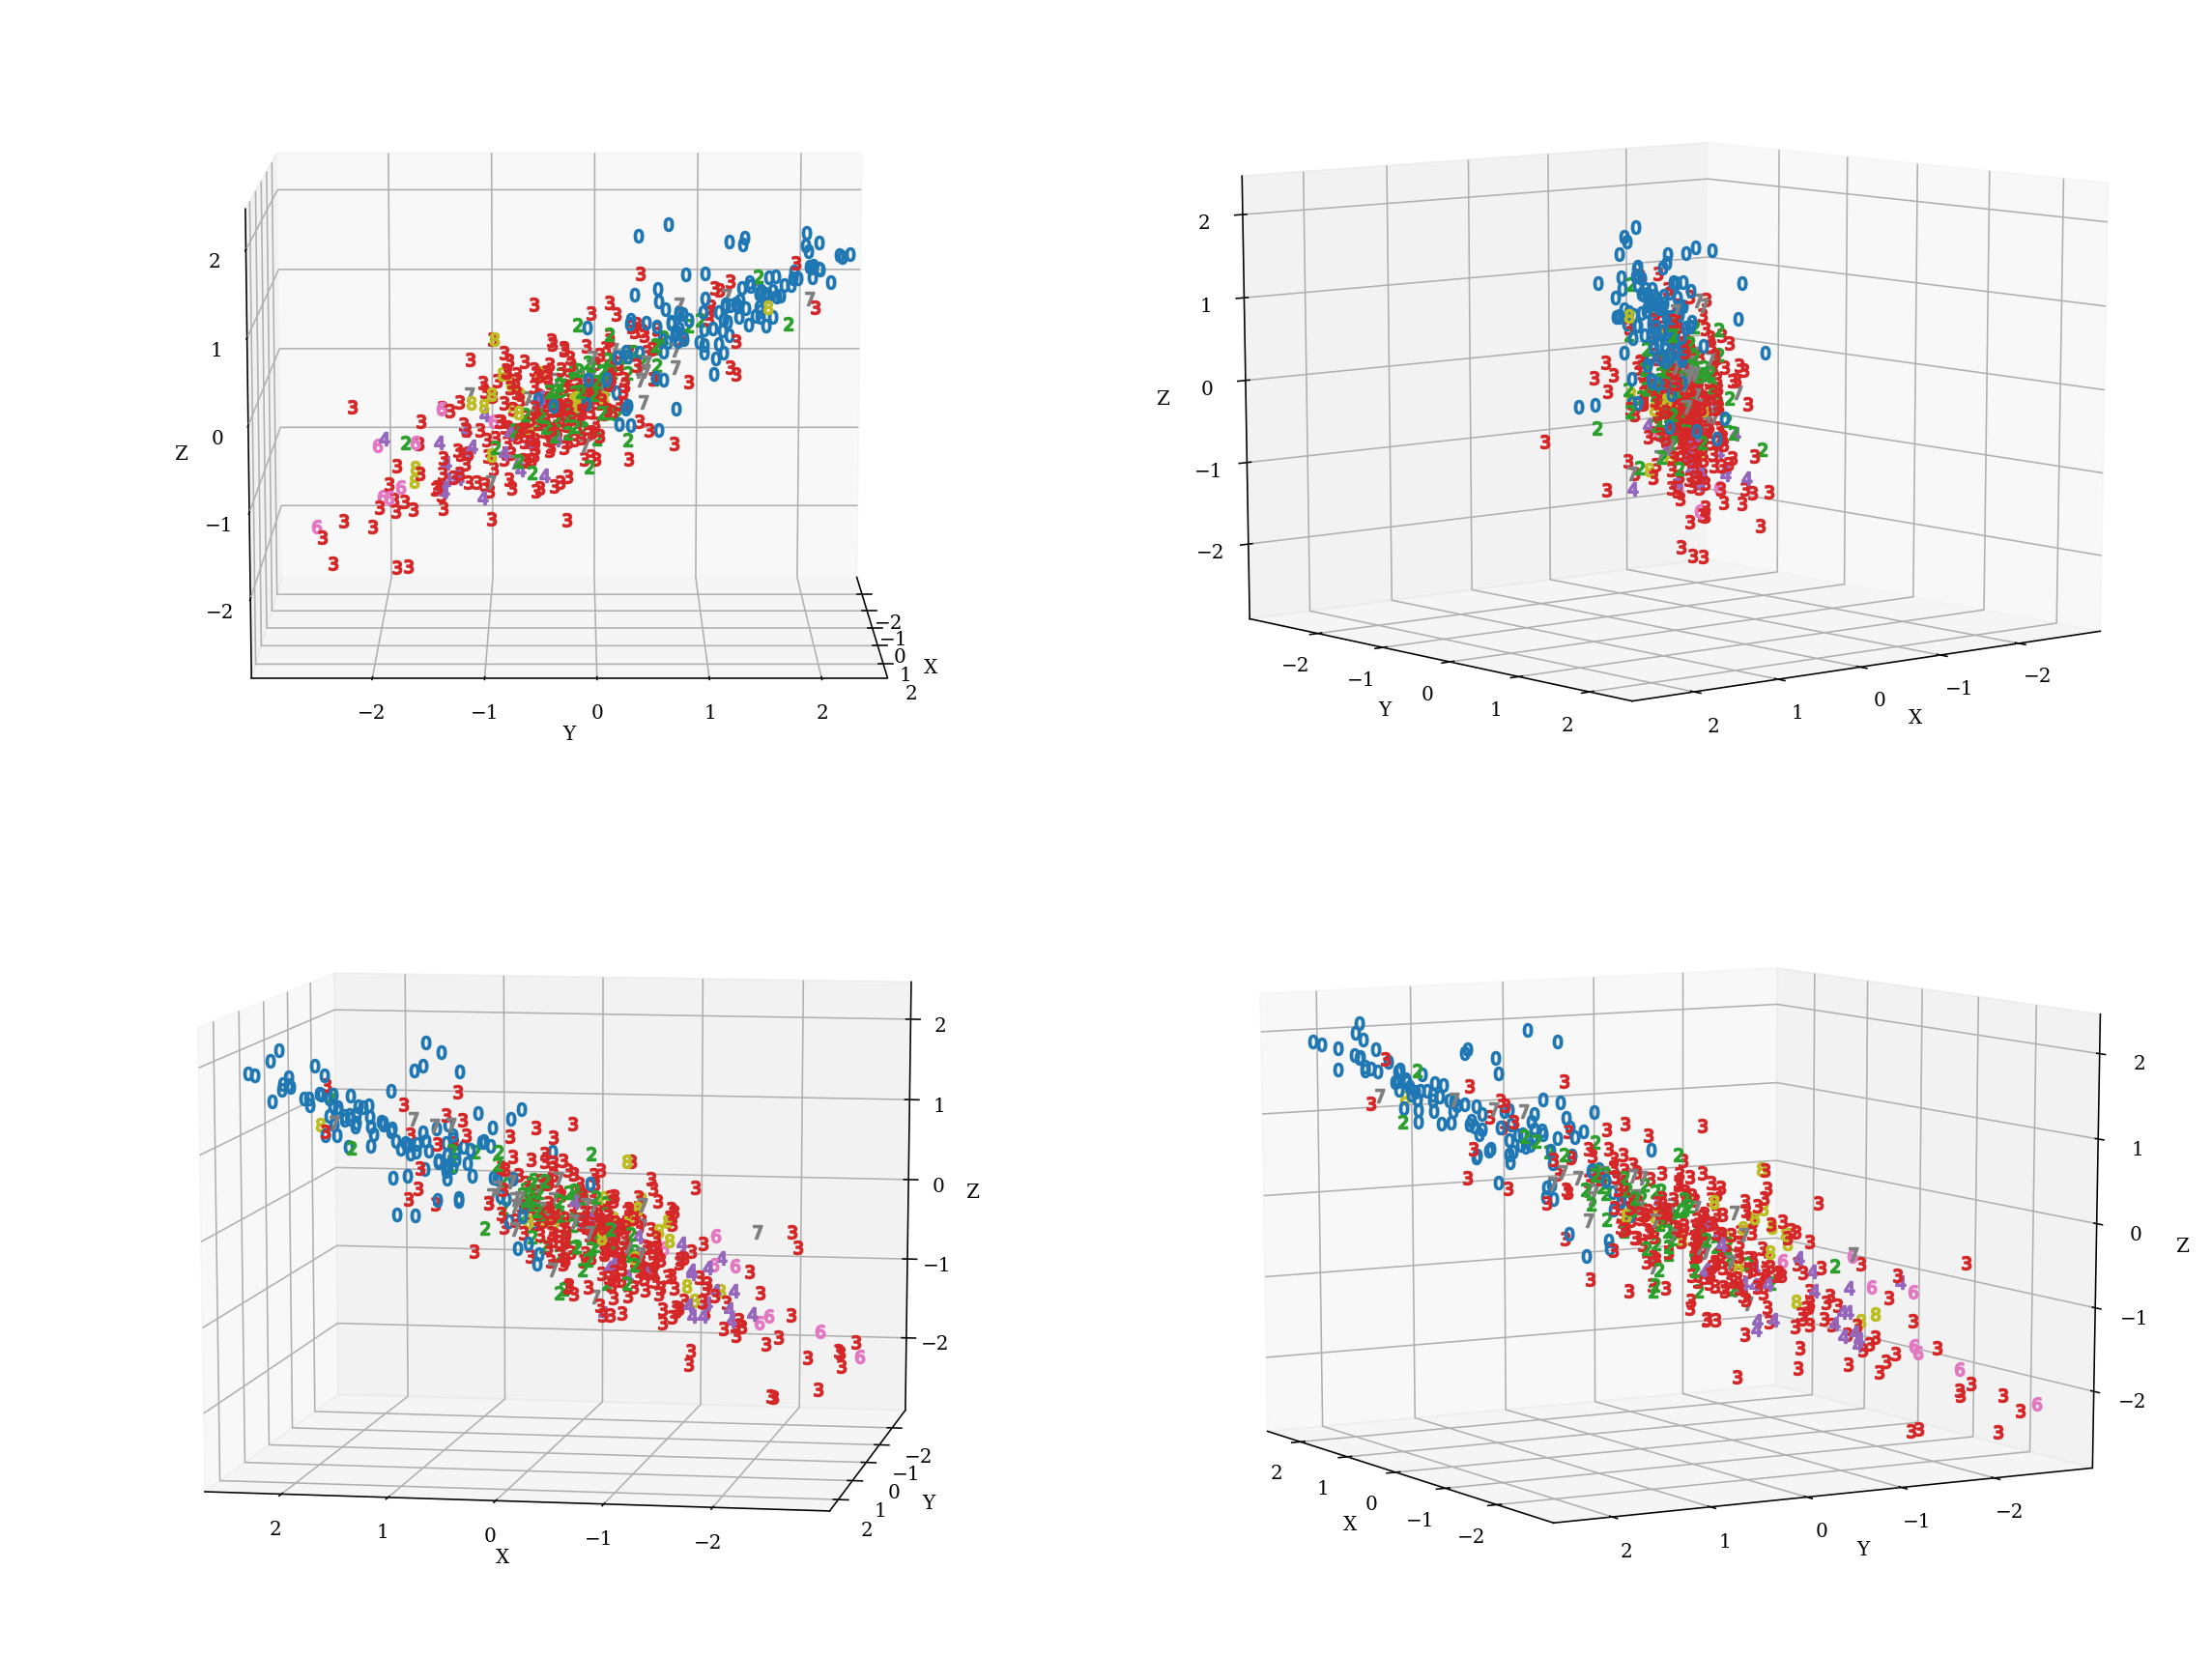

In [48]:
plotLSpace = True
if plotLSpace:
    %matplotlib inline

    # if more than 10 colors are needed, use Set3.
    # COLORS = pl.cm.Set3(np.linspace(0, 1, 12))
    COLORS = pl.cm.tab10(np.linspace(0, 1, 10))

    # select only part of data
    nSamples=500
    latent = latent.iloc[:nSamples]
    length = len(latent.latent_vector[0])
    
    #! 2D plot of latent space by labels
    if length == 2:
    
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111)
    
        for i, row in latent.iterrows():
            ax.plot(row.latent_vector[0], row.latent_vector[1], 
                    marker='${}$'.format(row.label), c=COLORS[row.label])
    
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()

    #! 3D plot of latent space by labels
    elif length == 3:
    
        fig = plt.figure(figsize=(16, 12))

        for itr in range(4):
            ax = fig.add_subplot(2, 2, itr+1, projection='3d')

            for i, row in latent.iterrows():
                ax.scatter(row.latent_vector[0], row.latent_vector[1], row.latent_vector[2],
                           marker='${}$'.format(row.label), s=45, c=[COLORS[row.label]])

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')

            ax.view_init(elev=10., azim=itr*50)

        plt.tight_layout()
        plt.show()

    #! ND plot of latent space by labels using PCA and tSNE dim reduction
    else:
    
        X = np.stack(latent.latent_vector, axis=0)
        # the output of the NN is normalized using nn.BatchNorm1d()
        # however, we could also standardize with a mean of 0 and std of 1.
        # X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
        components = PCA(n_components=2).fit_transform(X)
        embeded = TSNE(n_components=2).fit_transform(X)
    
        fig = plt.figure(figsize=(12, 5))
        ax = fig.add_subplot(1, 2, 1)

        for i, row in latent.iterrows():
            ax.plot(components[i, 0], components[i, 1], 
                    marker='${}$'.format(row.label), c=COLORS[row.label])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('PCA')

        ax = fig.add_subplot(1, 2, 2)

        for i, row in latent.iterrows():
            ax.plot(embeded[i, 0], embeded[i, 1], 
                    marker='${}$'.format(row.label), c=COLORS[row.label])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('tSNE')

        plt.show()

## Create an interactive 3D plot.

In [66]:
plotLSpace3D = False
if plotLSpace3D:
    if length == 3:
    
        %matplotlib notebook
        COLORS = pl.cm.tab10(np.linspace(0, 1, 10))
        
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        nSamples=500
        latent3D = latent.iloc[:nSamples]
        for i, row in latent3D.iterrows():
            ax.scatter(row.latent_vector[0], row.latent_vector[1], row.latent_vector[2],
                       marker='${}$'.format(row.label), s=45, c=[COLORS[row.label]])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

In [60]:
calcNClusters = True
plotNClusters = True
saveNClusters = True
nClustersPrefix = 'Ex1_nClusters'



In [67]:
# First pull out latent vector in usable form
if calcNClusters:
    

In [ ]:
if plotNClusters:
    for n_clusters in range_n_clusters:
    y_lower=10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to 
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
            
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10
            
        ax1.set_title("Silhouette Plot for {} Clusters".format(n_clusters))
        ax1.set_xlabel("Silhouette Coefficient")
        ax1.set_ylabel("Cluster")
        
        # The vertical line for average silhouette score of all values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-1, -0.6, -0.2, 0.2, 0.6, 1])
        
        # 2nd Plot showing actual clusters formed
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(latentVS[:,0], latentVS[:,1], latentVS[:,2],
                    marker='.', alpha=0.7, c=colors, edgecolor=colors)
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('')
        ax2.set_title("Visualiation of {} Clusters".format(n_clusters))

        #ax2.view_init(elev=10., azim=20)
        
        if saveNClusters:
            fileName = nClustersPrefix + str(n_clusters) + '.png'
            plt.savefig(fileName,bbox_inches='tight')
        else:
            plt.show()

In [ ]:
# Define k-Means Model
kmeans = KMeans(n_clusters=2).fit(latentV)

In [ ]:
kmeans.cluster_centers_

In [71]:
import pickle

In [72]:
with open('ex1_k8.pickle', 'wb') as f:
    pickle.dump([clusterer, cluster_labels, silhouette_avg, sample_silhouette_values], f)

In [ ]:
# Perform k-Means
if calcKMeans:
    %matplotlib inline
    
    noReduce = list(latentV.shape)[0]
    nReduced = noReduce  #500
    latentVS = np.empty([nReduced,nLSpace])
    latentVS = latentV[0:nReduced,:]
    COLORS = pl.cm.tab10(np.linspace(0, 1, 10))
    
    for n_clusters in range_n_clusters:
        #Create a subplot with 1 row and 2 columns
        fig = plt.figure(figsize=(12,5))
        ax1 = fig.add_subplot(1, 2, 1)
        
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-.1,1])
        
        # The (n_clusters+1)*10 is for inserting blank space between 
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(latentVS) + (n_clusters + 1)*10])
        
        # Initialize the clusterer with n_clusters value and a random generator
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)
        cluster_labels = clusterer.fit_predict(latentVS)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the
        # formed clusters
        silhouette_avg = silhouette_score(latentVS, cluster_labels)
        print("For n_clusters =", n_clusters, 
              "the average silhouette_score is ", silhouette_avg)
        
        # Compute silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(latentVS, cluster_labels)
        
        y_lower=10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to 
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
            
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10
            
        ax1.set_title("Silhouette Plot for {} Clusters".format(n_clusters))
        ax1.set_xlabel("Silhouette Coefficient")
        ax1.set_ylabel("Cluster")
        
        # The vertical line for average silhouette score of all values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-1, -0.6, -0.2, 0.2, 0.6, 1])
        
        # Write out average silhouette score
        sString = 'Avg Score = {:.2f}'.format(silhouette_avg)
        ax1.text(-1, len(latentVS) + (n_clusters + 1)*4, sString)
        
        # 2nd Plot showing actual clusters formed
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(latentVS[:,0], latentVS[:,1], latentVS[:,2],
                    marker='.', alpha=0.7, c=colors, edgecolor=colors)
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('')
        ax2.set_title("Visualiation of {} Clusters".format(n_clusters))

        #ax2.view_init(elev=10., azim=20)
        
        if saveNClusters:
            fileName = nClustersPrefix + str(n_clusters) + '.png'
            plt.savefig(fileName,bbox_inches='tight')
        else:
            plt.show()